In [3]:
import numpy as np
from scipy.stats import norm

def black_scholes_call(S0, K, T, r, sigma):
    """
    Calculate European call option price using Black-Scholes-Merton formula.
    
    Parameters:
    S0: Current stock price
    K: Strike price
    T: Time to maturity (in years)
    r: Risk-free rate (annual)
    sigma: Volatility (annual)
    
    Returns:
    Call option price
    """
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    call_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def monte_carlo_call(S0, K, T, r, sigma, n_sims, n_steps):
    """
    Approximate European call option price using Monte Carlo simulation.
    
    Parameters:
    S0: Current stock price
    K: Strike price
    T: Time to maturity (in years)
    r: Risk-free rate (annual)
    sigma: Volatility (annual)
    n_sims: Number of simulation paths
    n_steps: Number of time steps in each path
    
    Returns:
    Monte Carlo estimated call option price
    """
    dt = T / n_steps
    
    # Generate random normal variables for all paths
    Z = np.random.standard_normal((n_sims, n_steps))
    
    # Initialize stock prices
    S = np.zeros((n_sims, n_steps + 1))
    S[:, 0] = S0
    
    # Simulate GBM paths
    for t in range(1, n_steps + 1):
        S[:, t] = S[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[:, t-1])
    
    # Calculate payoffs at maturity
    payoffs = np.maximum(S[:, -1] - K, 0)
    
    # Discount back to present value
    call_price = np.exp(-r * T) * np.mean(payoffs)
    
    return call_price

def main():
    # Parameters (all adjustable)
    S0 = 100.0          # Current stock price
    K = 105.0           # Strike price
    T = 1.0             # Time to maturity (years)
    r = 0.05            # Risk-free rate (5%)
    sigma = 0.2         # Volatility (20%)
    n_sims = 100000     # Number of Monte Carlo simulations
    n_steps = 252       # Number of time steps (e.g., daily for 1 year)
    
    print("=" * 60)
    print("Black-Scholes-Merton Call Option Pricing")
    print("=" * 60)
    print(f"\nParameters:")
    print(f"  Current Stock Price (S_o): ${S0:.2f}")
    print(f"  Strike Price (K):         ${K:.2f}")
    print(f"  Time to Maturity (T):     {T:.2f} years")
    print(f"  Risk-Free Rate (r):       {r*100:.2f}%")
    print(f"  Volatility (sigma):       {sigma*100:.2f}%")
    print(f"  MC Simulations:           {n_sims:,}")
    print(f"  Time Steps per Path:      {n_steps:,}")
    
    # Calculate analytical Black-Scholes price
    bs_price = black_scholes_call(S0, K, T, r, sigma)
    
    # Calculate Monte Carlo approximation
    mc_price = monte_carlo_call(S0, K, T, r, sigma, n_sims, n_steps)
    
    # Calculate difference
    difference = mc_price - bs_price
    pct_error = (difference / bs_price) * 100
    
    print(f"\n" + "=" * 60)
    print("Results:")
    print("=" * 60)
    print(f"  Black-Scholes Price:      ${bs_price:.4f}")
    print(f"  Monte Carlo Price:        ${mc_price:.4f}")
    print(f"  Difference:               ${difference:.4f}")
    print(f"  Percentage Error:         {pct_error:.4f}%")
    print("=" * 60)

if __name__ == "__main__":
    main()

Black-Scholes-Merton Call Option Pricing

Parameters:
  Current Stock Price (S_o): $100.00
  Strike Price (K):         $105.00
  Time to Maturity (T):     1.00 years
  Risk-Free Rate (r):       5.00%
  Volatility (sigma):       20.00%
  MC Simulations:           100,000
  Time Steps per Path:      252

Results:
  Black-Scholes Price:      $8.0214
  Monte Carlo Price:        $8.0335
  Difference:               $0.0121
  Percentage Error:         0.1513%


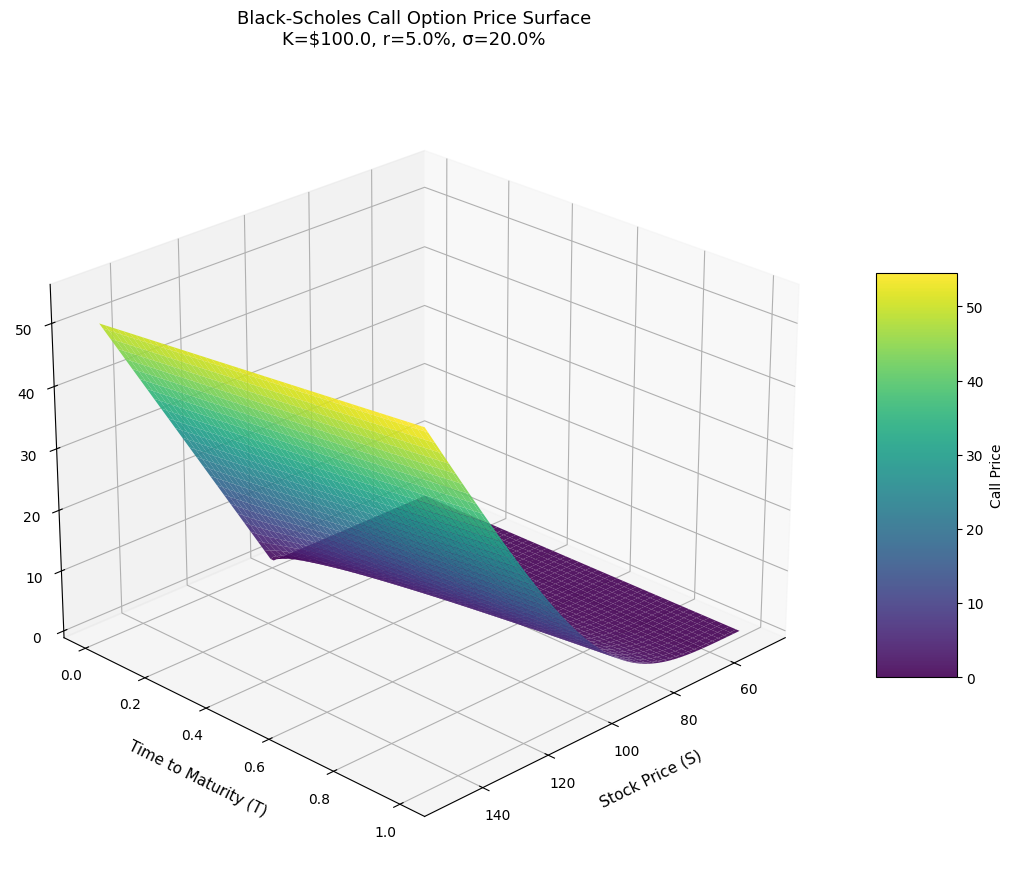

3D Surface Plot Parameters:
  Strike Price (K):     $100.00
  Risk-Free Rate (r):   5.00%
  Volatility (sigma):   20.00%
  Stock Price Range:    $50 - $150
  Time Range:           0 - 1.0 years


In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def black_scholes_call(S, K, T, r, sigma):
    """
    Calculate European call option price using Black-Scholes-Merton formula.
    
    Parameters:
    S: Stock price (can be array)
    K: Strike price
    T: Time to maturity in years (can be array)
    r: Risk-free rate (annual)
    sigma: Volatility (annual)
    
    Returns:
    Call option price
    """
    # Handle the case where T = 0 (at maturity)
    if np.isscalar(T):
        if T == 0:
            return np.maximum(S - K, 0)
        d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
        d2 = d1 - sigma * np.sqrt(T)
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        # Vectorized version for arrays
        result = np.zeros_like(T)
        mask = T > 0
        
        # At maturity (T=0), call value is intrinsic value
        result[~mask] = np.maximum(S[~mask] - K, 0)
        
        # Before maturity, use BS formula
        if np.any(mask):
            S_active = S[mask]
            T_active = T[mask]
            d1 = (np.log(S_active / K) + (r + 0.5 * sigma**2) * T_active) / (sigma * np.sqrt(T_active))
            d2 = d1 - sigma * np.sqrt(T_active)
            result[mask] = S_active * norm.cdf(d1) - K * np.exp(-r * T_active) * norm.cdf(d2)
        
        return result

def plot_call_surface():
    """
    Create 3D surface plot of call option price as function of stock price and time.
    """
    # Parameters (adjustable)
    K = 100.0           # Strike price
    r = 0.05            # Risk-free rate (5%)
    sigma = 0.2         # Volatility (20%)
    
    # Create grid for stock prices and time to maturity
    S_min, S_max = 50, 150
    T_min, T_max = 0, 1.0  # 0 to 1 year
    
    S_vals = np.linspace(S_min, S_max, 100)
    T_vals = np.linspace(T_min, T_max, 100)
    
    S_grid, T_grid = np.meshgrid(S_vals, T_vals)
    
    # Calculate call prices for each point on the grid
    C_grid = np.zeros_like(S_grid)
    for i in range(len(T_vals)):
        for j in range(len(S_vals)):
            C_grid[i, j] = black_scholes_call(S_grid[i, j], K, T_grid[i, j], r, sigma)
    
    # Create 3D plot
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot surface
    surf = ax.plot_surface(S_grid, T_grid, C_grid, cmap='viridis', 
                          alpha=0.9, edgecolor='none', antialiased=True)
    
    # Labels and title
    ax.set_xlabel('Stock Price (S)', fontsize=11, labelpad=10)
    ax.set_ylabel('Time to Maturity (T)', fontsize=11, labelpad=10)
    ax.set_zlabel('Call Option Price (C)', fontsize=11, labelpad=10)
    ax.set_title(f'Black-Scholes Call Option Price Surface\nK=${K}, r={r*100}%, σ={sigma*100}%', 
                 fontsize=13, pad=20)
    
    # Add colorbar
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Call Price')
    
    # Set viewing angle
    ax.view_init(elev=25, azim=45)
    
    plt.tight_layout()
    plt.show()
    
    print("3D Surface Plot Parameters:")
    print(f"  Strike Price (K):     ${K:.2f}")
    print(f"  Risk-Free Rate (r):   {r*100:.2f}%")
    print(f"  Volatility (sigma):   {sigma*100:.2f}%")
    print(f"  Stock Price Range:    ${S_min} - ${S_max}")
    print(f"  Time Range:           {T_min} - {T_max} years")

if __name__ == "__main__":
    plot_call_surface()

In [1]:
import matplotlib
matplotlib.use('TkAgg')
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def black_scholes_call(S, K, T, r, sigma):
    """
    Calculate European call option price using Black-Scholes-Merton formula.
    
    Parameters:
    S: Stock price (can be array)
    K: Strike price
    T: Time to maturity in years
    r: Risk-free rate (annual)
    sigma: Volatility (annual)
    
    Returns:
    Call option price
    """
    if T == 0:
        return np.maximum(S - K, 0)
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def animate_call_price():
    """
    Animate call option price as a function of stock price for increasing time to maturity.
    """
    # Parameters (adjustable)
    K = 100.0           # Strike price
    r = 0.05            # Risk-free rate (5%)
    sigma = 0.2         # Volatility (20%)
    
    # Stock price range
    S_vals = np.linspace(50, 150, 200)
    
    # Time to maturity values for animation
    T_vals = np.linspace(0, 2.0, 100)  # 0 to 2 years
    
    # Set interactive backend
    plt.ion()
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 7))
    
    # Plot intrinsic value (payoff at maturity)
    intrinsic = np.maximum(S_vals - K, 0)
    ax.plot(S_vals, intrinsic, 'k--', linewidth=2, label='Intrinsic Value (T=0)', alpha=0.5)
    
    # Initialize line for call price
    line, = ax.plot([], [], 'b-', linewidth=2.5, label='Call Price')
    
    # Add strike price line
    ax.axvline(x=K, color='r', linestyle=':', linewidth=1.5, alpha=0.7, label=f'Strike K=${K}')
    
    # Text for current T value
    time_text = ax.text(0.58, 0.02, '', transform=ax.transAxes, 
                    fontsize=12, verticalalignment='bottom',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # Set labels and title
    ax.set_xlabel('Stock Price (S)', fontsize=12)
    ax.set_ylabel('Call Option Price (C)', fontsize=12)
    ax.set_title(f'Call Option Price vs Stock Price\nK=${K}, r={r*100}%, σ={sigma*100}%', 
                 fontsize=13)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper left', fontsize=10)
    
    # Set axis limits
    ax.set_xlim(50, 150)
    ax.set_ylim(0, 60)
    
    def init():
        """Initialize animation"""
        line.set_data([], [])
        time_text.set_text('')
        return line, time_text
    
    def update(frame):
        """Update animation for each frame"""
        T = T_vals[frame]
        
        # Calculate call prices for current T
        call_prices = black_scholes_call(S_vals, K, T, r, sigma)
        
        # Update line data
        line.set_data(S_vals, call_prices)
        
        # Update time text
        time_text.set_text(f'Time to Maturity: T = {T:.3f} years')
        
        return line, time_text
    
    print("Animation Parameters:")
    print(f"  Strike Price (K):     ${K:.2f}")
    print(f"  Risk-Free Rate (r):   {r*100:.2f}%")
    print(f"  Volatility (sigma):   {sigma*100:.2f}%")
    print(f"  Time Range:           {T_vals[0]:.2f} - {T_vals[-1]:.2f} years")
    print(f"  Number of Frames:     {len(T_vals)}")
    
    plt.tight_layout()
    
    # Create animation - keep reference alive
    anim = FuncAnimation(fig, update, init_func=init, 
                        frames=len(T_vals), interval=50, 
                        blit=False, repeat=True)
    
    plt.show(block=True)
    
    return anim  # Return to keep reference alive

if __name__ == "__main__":
    animate_call_price()

Animation Parameters:
  Strike Price (K):     $100.00
  Risk-Free Rate (r):   5.00%
  Volatility (sigma):   20.00%
  Time Range:           0.00 - 2.00 years
  Number of Frames:     100
